#A Comparative Analysis on Liver Disease (Cirrhosis) Prediction using Supervised Machine Learning Algorithms


Cirrhosis is severe scarring of the liver. This serious condition can be caused by many forms of liver diseases and conditions, such as hepatitis or chronic alcoholism.

Each time your liver is injured — whether by excessive alcohol consumption or another cause, such as infection — it tries to repair itself. In the process, scar tissue forms. As cirrhosis gets worse, more and more scar tissue forms, making it difficult for the liver to do its job. Advanced cirrhosis is life-threatening.

The liver damage caused by cirrhosis generally can't be undone. But if liver cirrhosis is diagnosed early and the underlying cause is treated, further damage can be limited. In rare cases, it may be reversed.

**About DataSet**
* ID: A unique identifier for each patient in the dataset.
* N_Days: The number of days since the beginning of the study or diagnosis.
* Status: The patient's status at the time of last follow-up. Common values might be:
'D': Deceased
'C': Censored (patient alive at last follow-up)
'CL': Liver transplant
* Drug: The treatment group, e.g., 'D-penicillamine' or 'Placebo'. This indicates whether the patient received the drug or was in the control group.
* Age: The age of the patient in years.
* Sex: The gender of the patient, typically 'F' for female and 'M' for male.
* Ascites: Presence of ascites (fluid accumulation in the abdomen):
'Y': Yes
'N': No
* Hepatomegaly: Presence of an enlarged liver:
'Y': Yes
'N': No
* Spiders: Presence of spider angiomata (dilated blood vessels visible on the skin):
'Y': Yes
'N': No
* Edema: Presence of swelling (edema), categorized as:
'Y': Yes
'N': No
'S': Edema controlled by diuretics
* Bilirubin: Blood bilirubin level, a measure of liver function.
* Cholesterol: Blood cholesterol level.
* Albumin: Blood albumin level, another measure of liver function.
* Copper: Copper concentration in the blood, important in liver-related diseases.
* Alk_Phos: Alkaline phosphatase level, an enzyme related to bile ducts and liver function.
* SGOT: Serum glutamic oxaloacetic transaminase (SGOT) level, an enzyme related to liver function.
* Tryglicerides: Blood triglyceride level, indicating fat levels.
* Platelets: Blood platelet count, relevant for blood clotting.
* Prothrombin: Prothrombin time, a measure of how long it takes blood to clot.
* Stage: The stage of liver disease, typically ranging from 1 to 4, with 4 being the most severe.

**Importing Data**

In [ ]:
import pandas as pd
data=pd.read_csv("/content/cirrhosis.csv")

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


## **EDA-Exploratory Data Analysis**

**Understanding Data**

In [ ]:
data.shape

(418, 20)

In [ ]:
data.size

8360

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
data.nunique()

,0
ID,418
N_Days,399
Status,3
Drug,2
Age,344
Sex,2
Ascites,2
Hepatomegaly,2
Spiders,2
Edema,3


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [ ]:
data.describe(include=object).T

,count,unique,top,freq
Status,418,3,C,232
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354


In [ ]:
data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
col = ["Status","Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema","Stage"]
for i in col:
    print(f"{i} : {data[i].unique()}")

Status : ['D' 'C' 'CL']
Drug : ['D-penicillamine' 'Placebo' nan]
Sex : ['F' 'M']
Ascites : ['Y' 'N' nan]
Hepatomegaly : ['Y' 'N' nan]
Spiders : ['Y' 'N' nan]
Edema : ['Y' 'N' 'S']
Stage : [ 4.  3.  2.  1. nan]


In [ ]:
data.drop(['ID'], axis=1, inplace=True)

In [ ]:
data['Age']=(data['Age']/365).round(0)
data['Age']

,Age
0,59.0
1,56.0
2,70.0
3,55.0
4,38.0
...,...
413,67.0
414,39.0
415,57.0
416,58.0


In [ ]:
data.isnull().sum()

,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0
Bilirubin,0


In [ ]:
data.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

## Visualizing Missing Data

<Axes: >

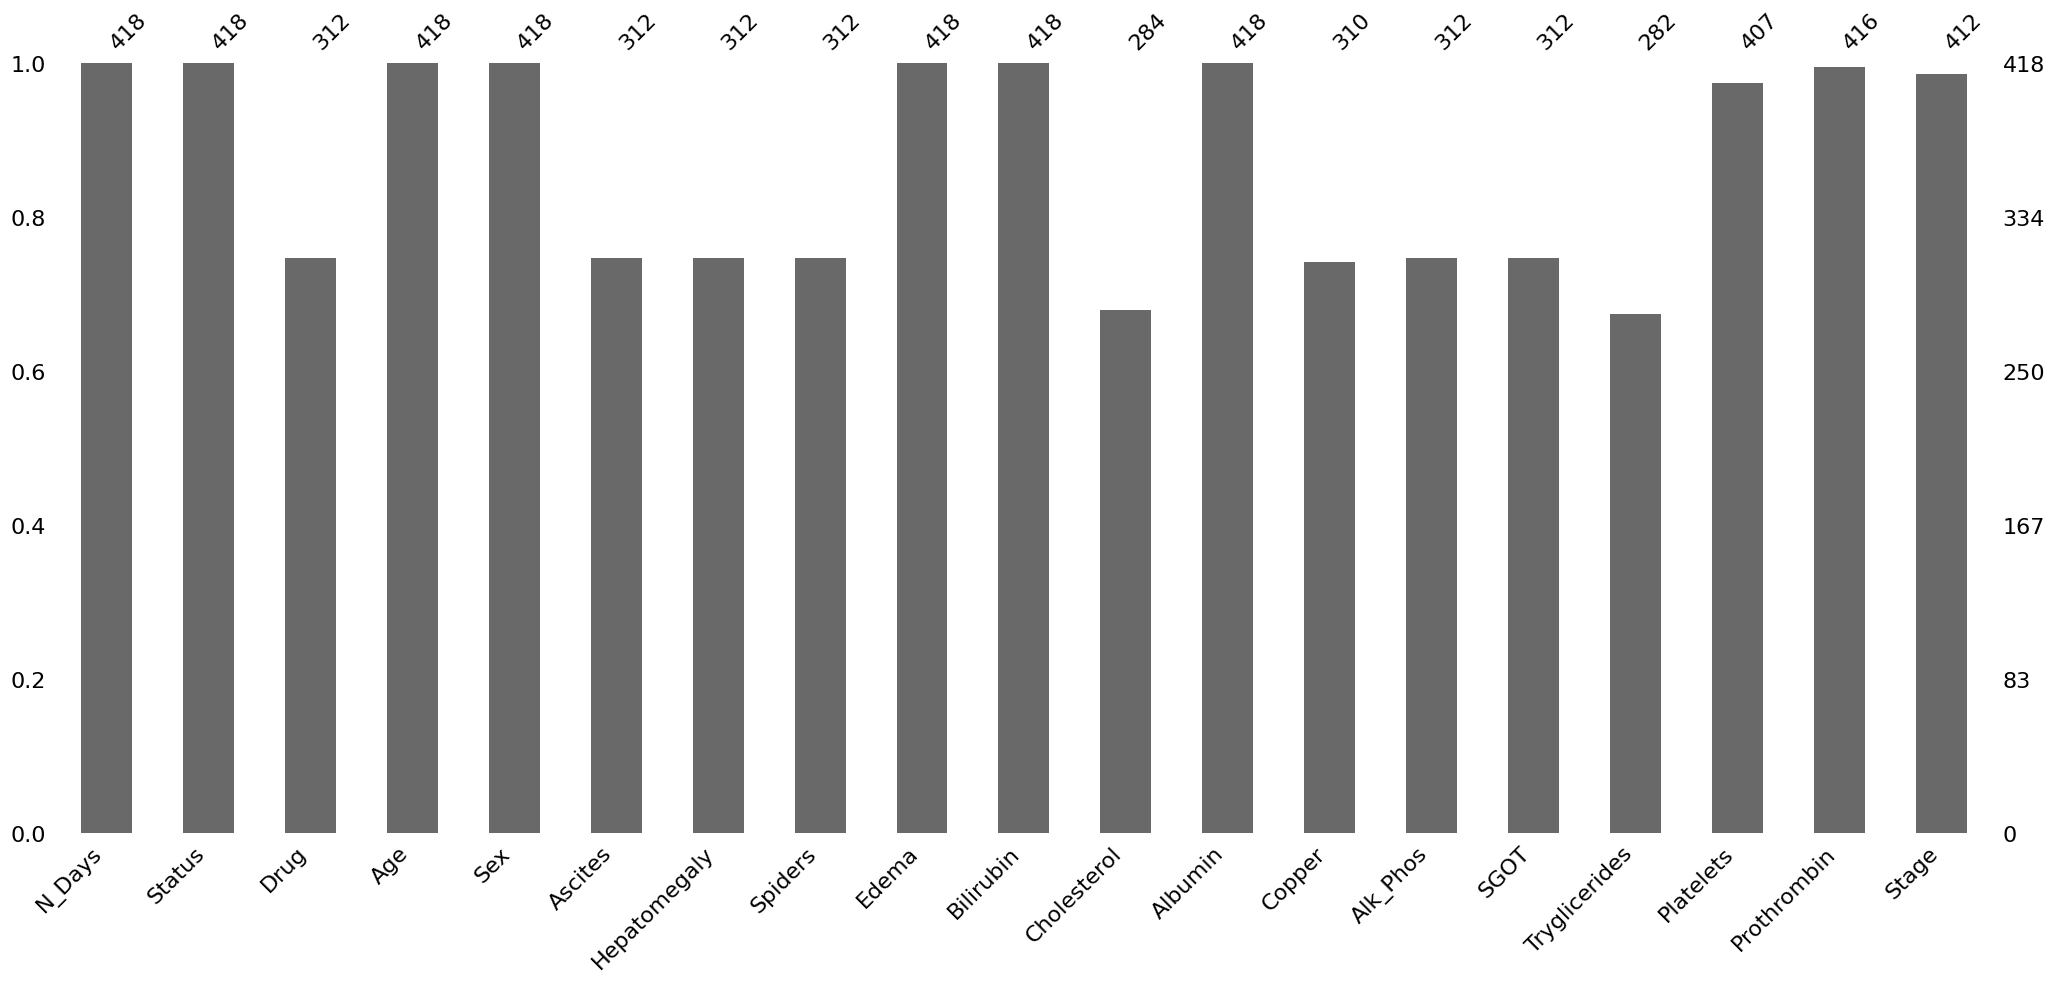

In [ ]:
import missingno as m
m.bar(data)

<Axes: >

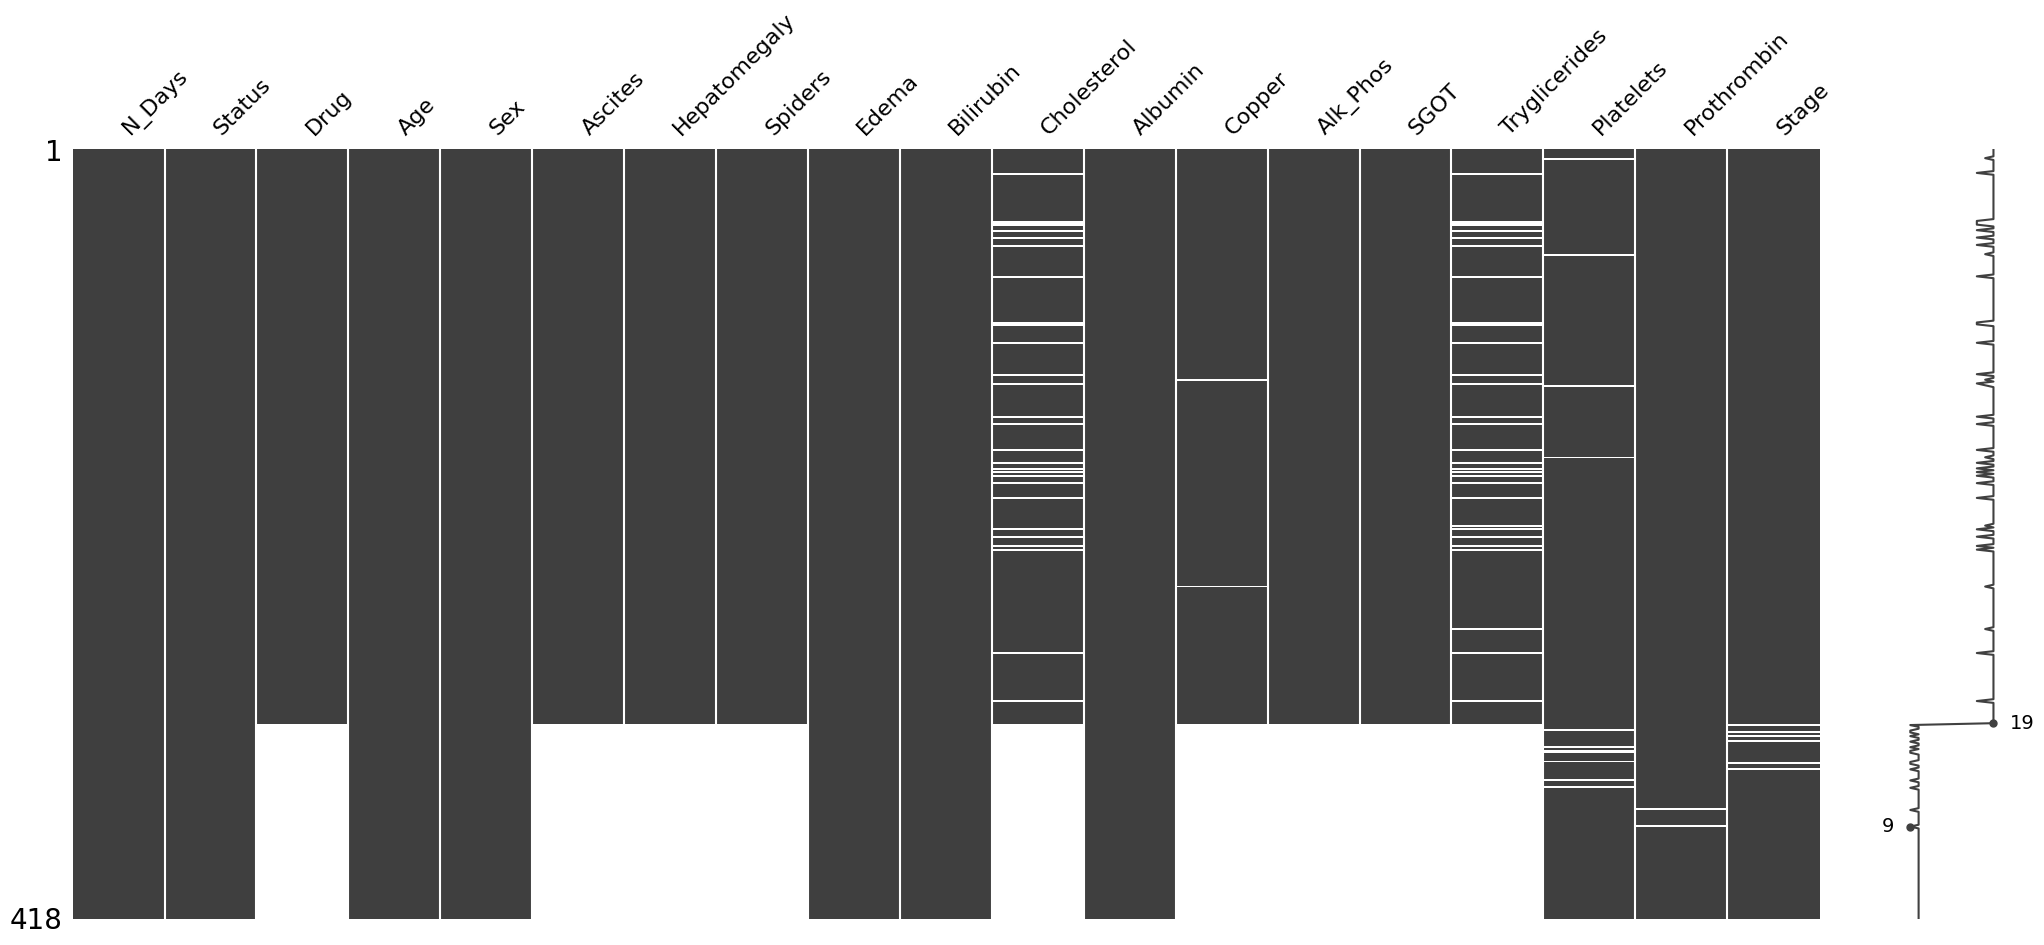

In [ ]:
m.matrix(data)

In [ ]:
df=data.copy()

In [ ]:
df.dtypes

,0
N_Days,int64
Status,object
Drug,object
Age,float64
Sex,object
Ascites,object
Hepatomegaly,object
Spiders,object
Edema,object
Bilirubin,float64


## **Handling Missing Values**

In [ ]:
num_columns = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
for col in num_columns:
    df[col].interpolate(method='linear', inplace=True)

cat_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

1.  Numerical Columns: Missing values are interpolated linearly to estimate missing values based on surrounding data points.
2. Categorical Columns: Missing values are filled with the mode in each respective column.

In [ ]:
df.isnull().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


# **Data Preprocessing**

Univariate

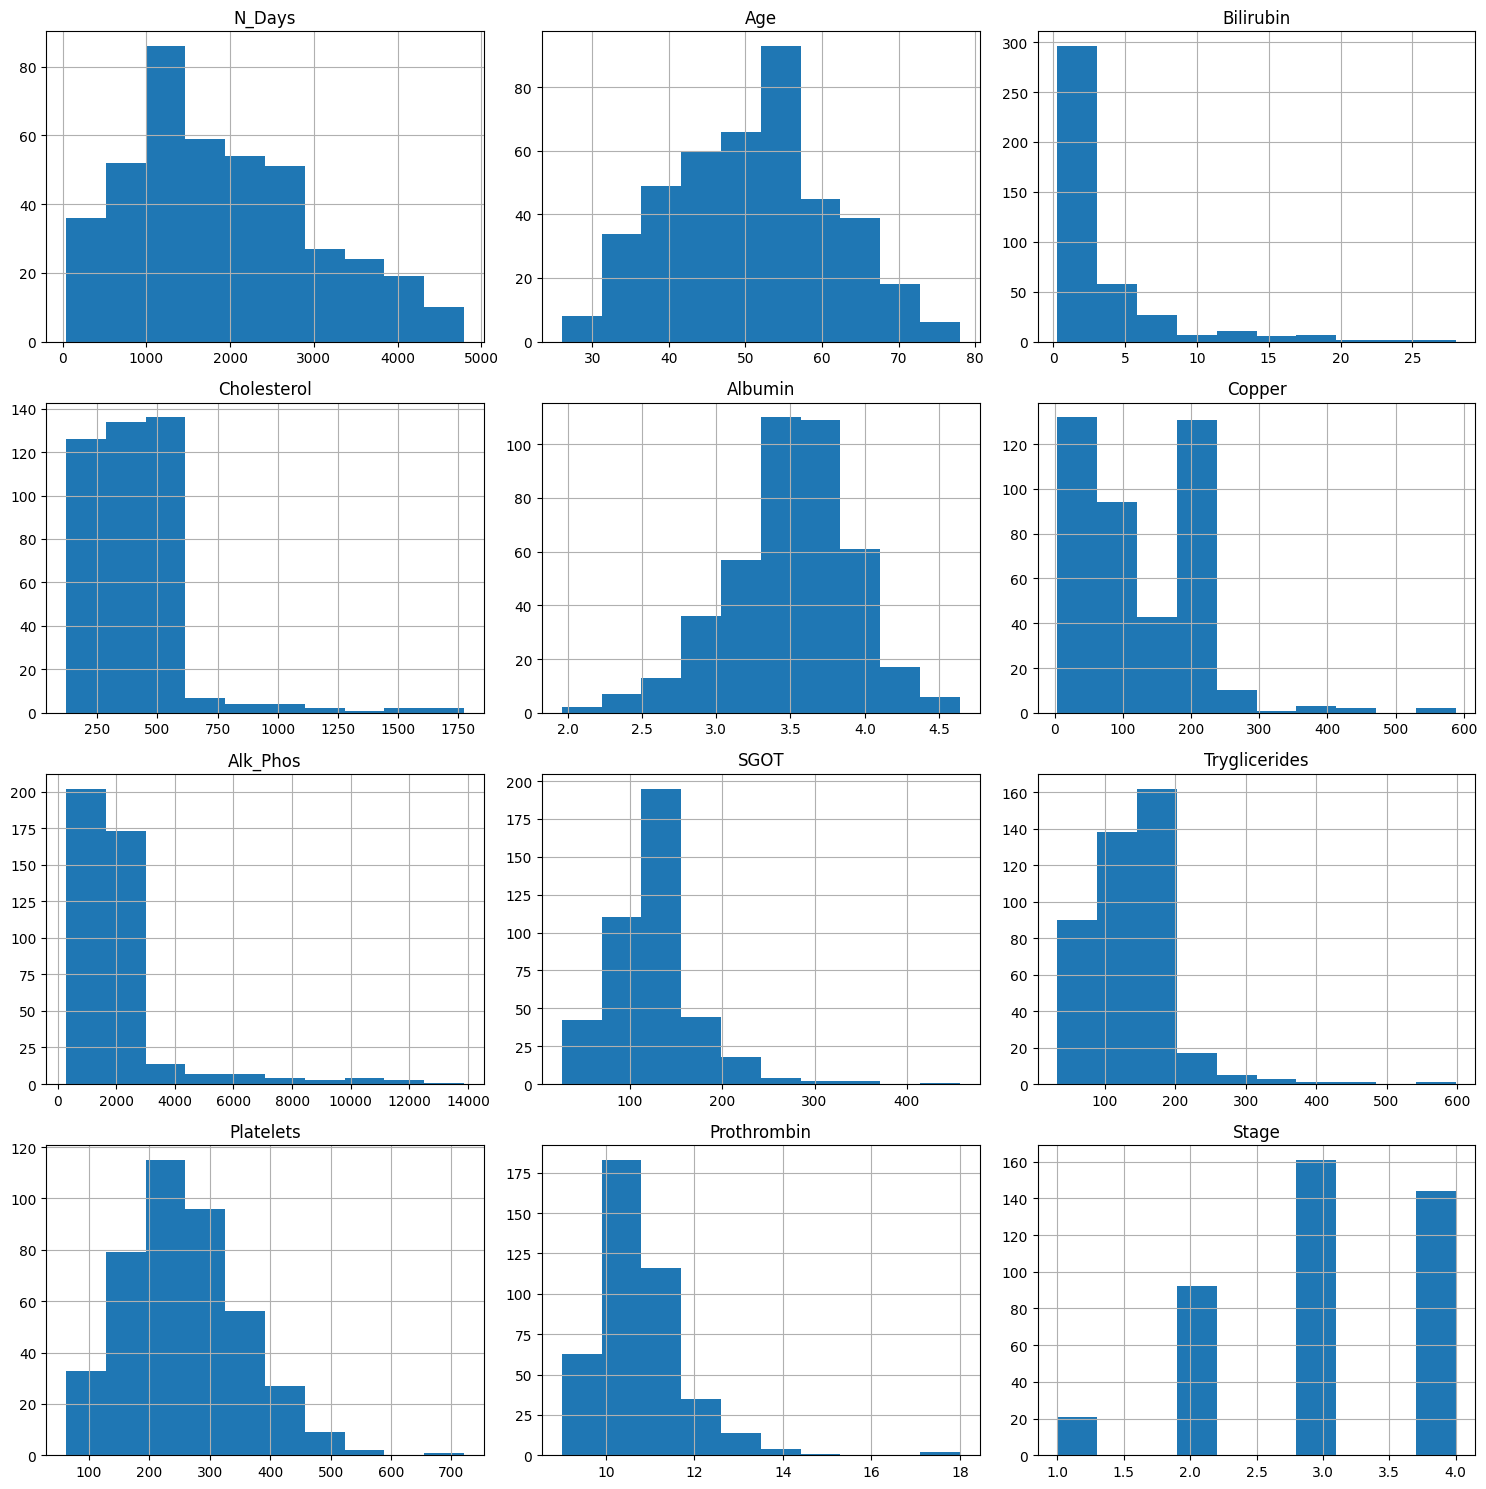

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

### **Distribution of Categorical columnns**

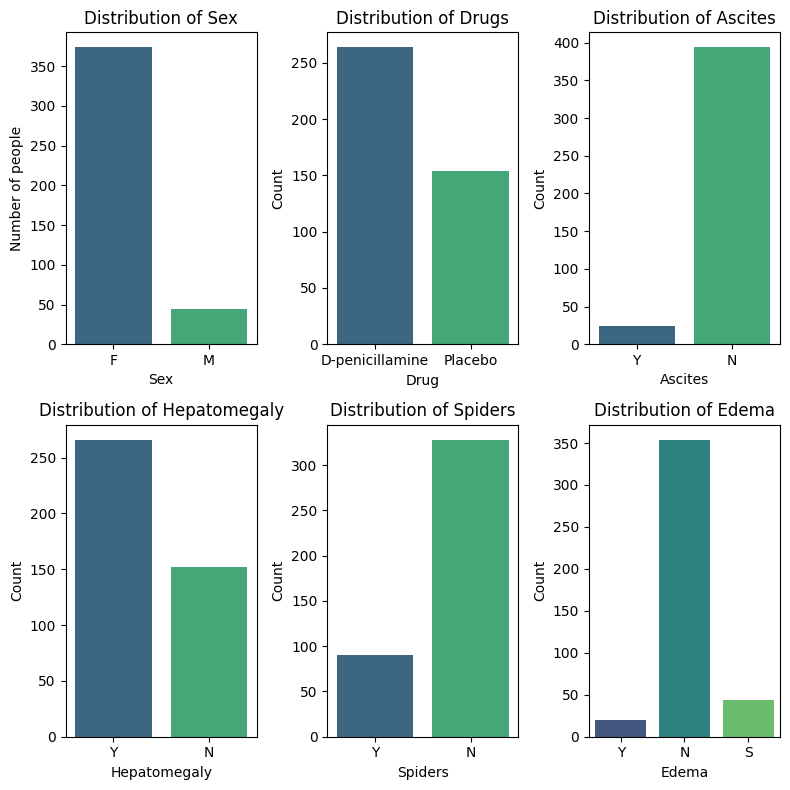

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(8,8))

sns.countplot(x='Sex', data=df, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sex')
axes[0, 0].set_ylabel('Number of people')
axes[0, 0].set_xlabel('Sex')

sns.countplot(data=df, x='Drug', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Drugs')
axes[0, 1].set_xlabel('Drug')
axes[0, 1].set_ylabel('Count')

sns.countplot(data=df, x='Ascites', palette='viridis', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Ascites')
axes[0, 2].set_xlabel('Ascites')
axes[0, 2].set_ylabel('Count')

sns.countplot(data=df, x='Hepatomegaly', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Hepatomegaly')
axes[1, 0].set_xlabel('Hepatomegaly')
axes[1, 0].set_ylabel('Count')

sns.countplot(data=df, x='Spiders', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Spiders')
axes[1, 1].set_xlabel('Spiders')
axes[1, 1].set_ylabel('Count')

sns.countplot(data=df, x='Edema', palette='viridis', ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Edema')
axes[1, 2].set_xlabel('Edema')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


1.   Dataset Contains more Female records than Male records
2.   Usage of D-penicillamine is more than Placebo







**Target column Distribution**

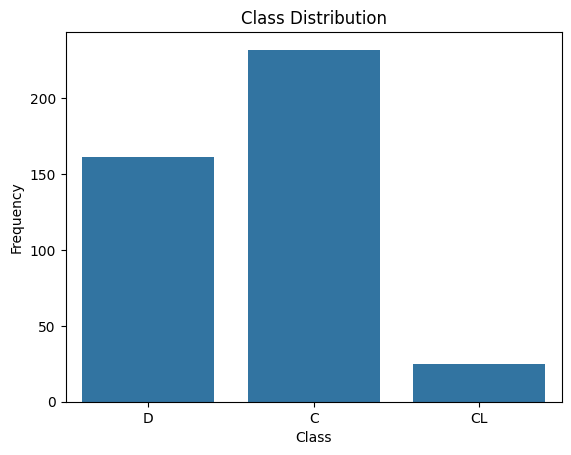

In [ ]:
sns.countplot(x='Status',data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

* D means the person is dead, which is correct.
* C It means they are alive at the last follow-up, but we don’t know what happened afterward.
* CL It means the person received a liver transplant, and they are no longer being followed for disease progression after that.

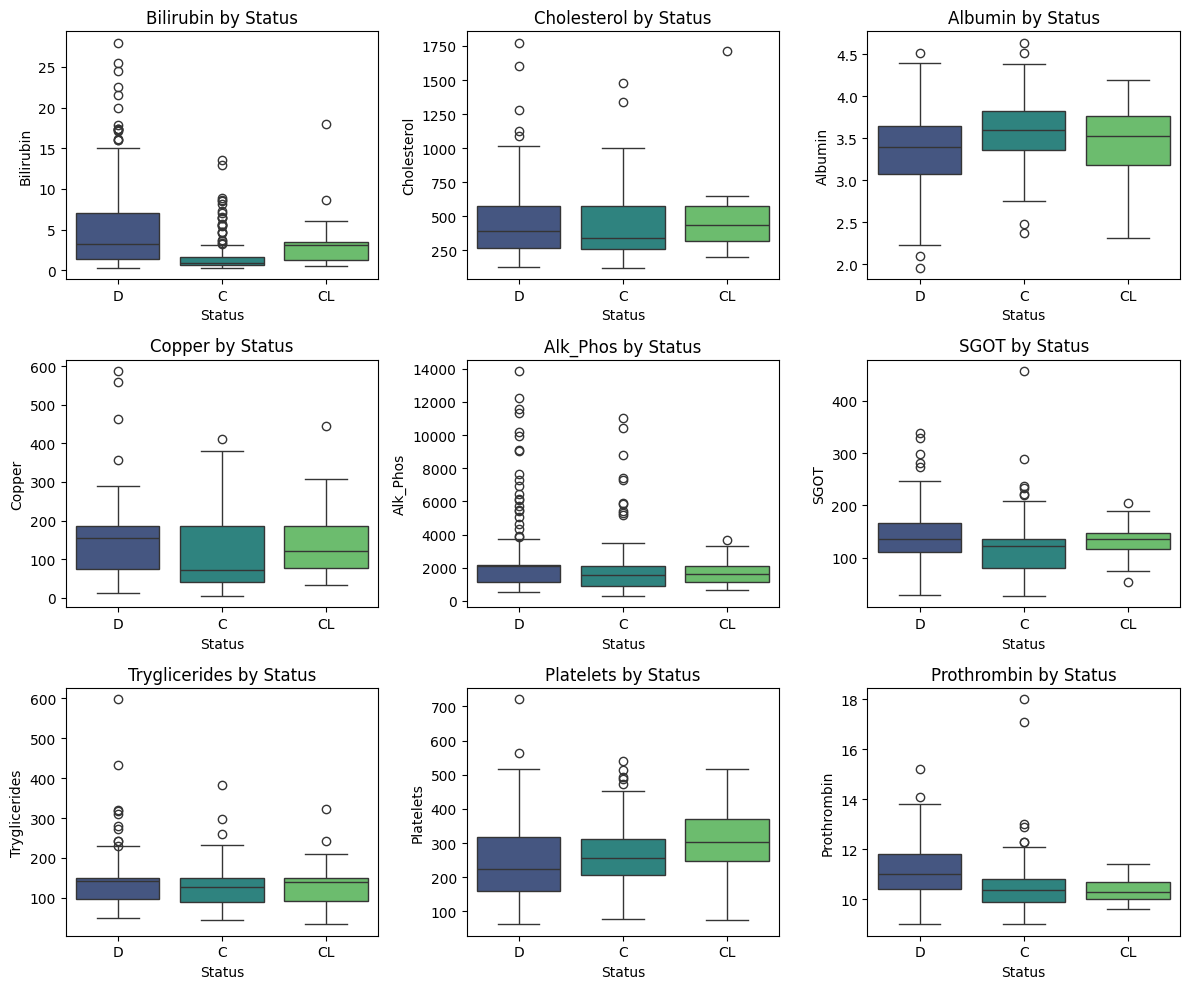

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

sns.boxplot(x='Status', y='Bilirubin', data=df, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Bilirubin by Status')
axes[0, 0].set_xlabel('Status')
axes[0, 0].set_ylabel('Bilirubin')

sns.boxplot(x='Status', y='Cholesterol', data=df, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Cholesterol by Status')
axes[0, 1].set_xlabel('Status')
axes[0, 1].set_ylabel('Cholesterol')

sns.boxplot(x='Status', y='Albumin', data=df, palette='viridis', ax=axes[0, 2])
axes[0, 2].set_title('Albumin by Status')
axes[0, 2].set_xlabel('Status')
axes[0, 2].set_ylabel('Albumin')

sns.boxplot(x='Status', y='Copper', data=df, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Copper by Status')
axes[1, 0].set_xlabel('Status')
axes[1, 0].set_ylabel('Copper')

sns.boxplot(x='Status', y='Alk_Phos', data=df, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Alk_Phos by Status')
axes[1, 1].set_xlabel('Status')
axes[1, 1].set_ylabel('Alk_Phos')

sns.boxplot(x='Status', y='SGOT', data=df, palette='viridis', ax=axes[1, 2])
axes[1, 2].set_title('SGOT by Status')
axes[1, 2].set_xlabel('Status')
axes[1, 2].set_ylabel('SGOT')

sns.boxplot(x='Status', y='Tryglicerides', data=df, palette='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Tryglicerides by Status')
axes[2, 0].set_xlabel('Status')
axes[2, 0].set_ylabel('Tryglicerides')

sns.boxplot(x='Status', y='Platelets', data=df, palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Platelets by Status')
axes[2, 1].set_xlabel('Status')
axes[2, 1].set_ylabel('Platelets')

sns.boxplot(x='Status', y='Prothrombin', data=df, palette='viridis', ax=axes[2, 2])
axes[2, 2].set_title('Prothrombin by Status')
axes[2, 2].set_xlabel('Status')
axes[2, 2].set_ylabel('Prothrombin')

plt.tight_layout()
plt.show()

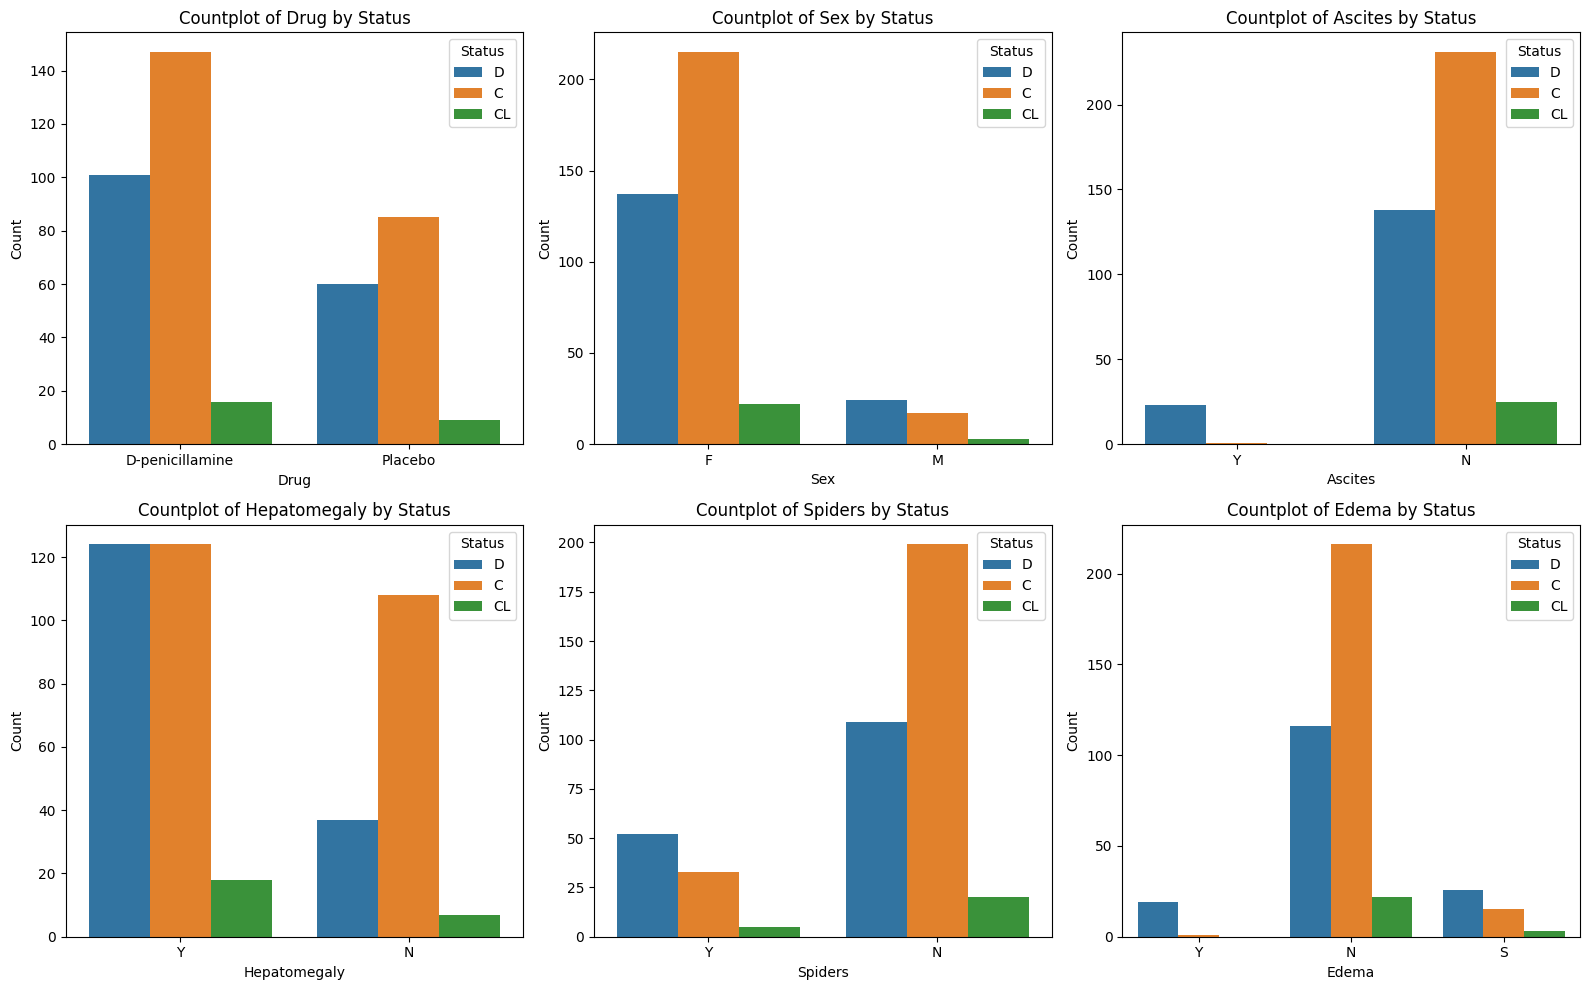

In [ ]:
cat_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, hue='Status', data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {col} by Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

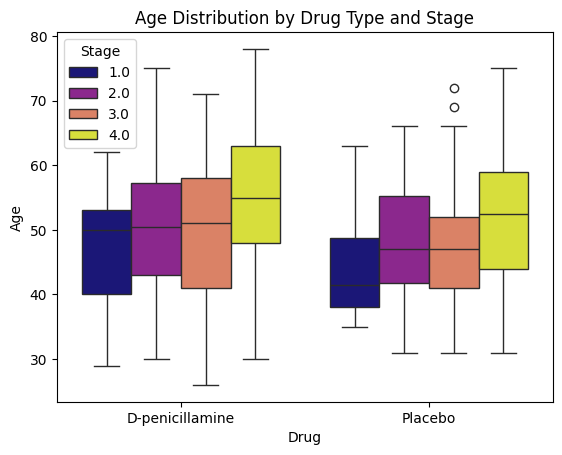

In [ ]:
sns.boxplot(x='Drug', y='Age',hue='Stage',data=df,palette='plasma')
plt.title("Age Distribution by Drug Type and Stage")
plt.xlabel("Drug")
plt.ylabel("Age")
plt.show()

1. Most of the younger patients are in stage 3
2. Most of the Eldest patients are in stage 4
3. Patients in Stage 1 are mostly prefering D--penicillamine.
4. Placebo is less chosen compared to D--penicillamine irrespective of Age

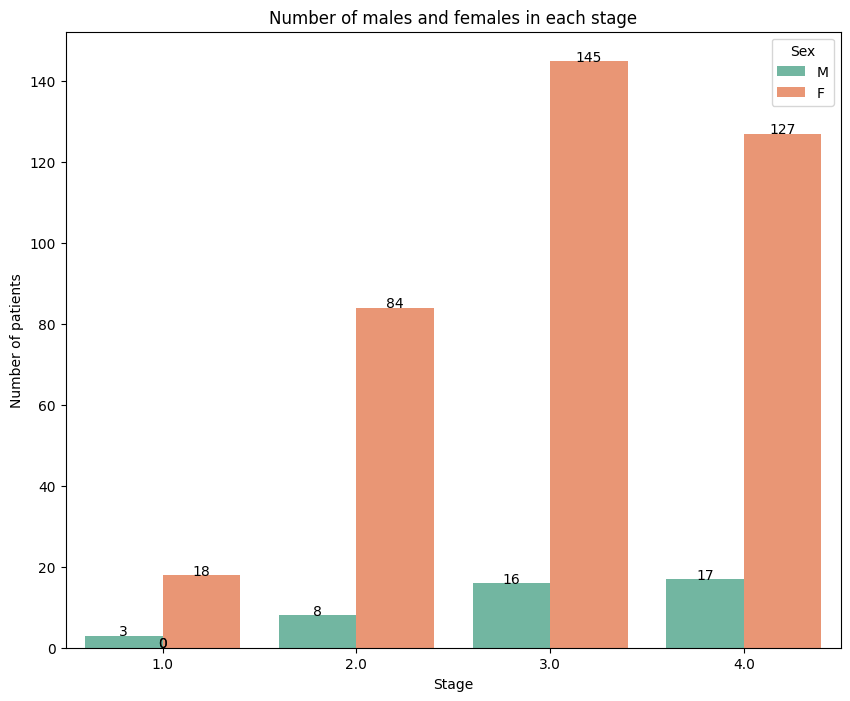

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Stage',hue='Sex',data=df, palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}',ha='center')
plt.title("Number of males and females in each stage")
plt.xlabel('Stage')
plt.ylabel('Number of patients')
plt.show()

As we know that the dataset contains 90% of Female records and 10% Male records, Most of the patients are in stage 4 and stage 3 Comparitively.

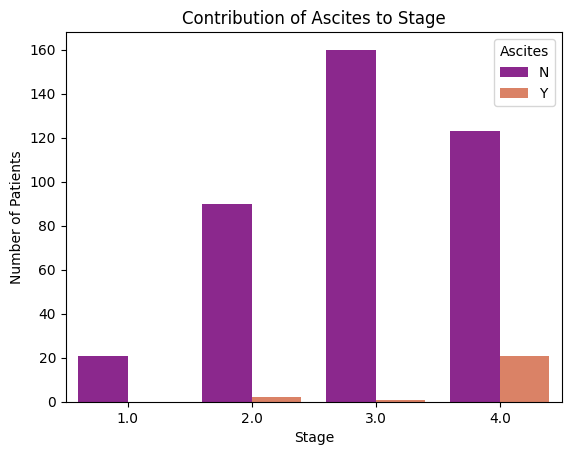

In [ ]:
sns.countplot(x='Stage',hue='Ascites',data=df,palette="plasma")
plt.title("Contribution of Ascites to Stage")
plt.xlabel('Stage')
plt.ylabel('Number of Patients')
plt.show()

* From this plot we can observe that Ascites is more commonly observed in advanced stages(Stage 4) and Ascites is less likely to be associated with the earlier stages

* Presence of ascites alone is not enough to predict the stage


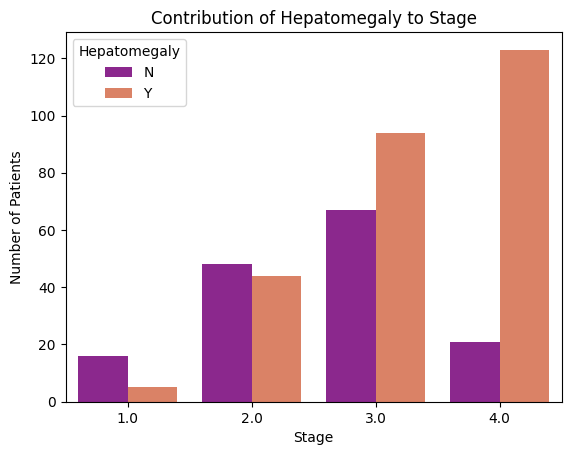

In [ ]:
sns.countplot(x='Stage',hue='Hepatomegaly',data=df,palette="plasma")
plt.title("Contribution of Hepatomegaly to Stage")
plt.xlabel('Stage')
plt.ylabel('Number of Patients')
plt.show()

Hepatomegaly is more common in advanced stages, particularly Stage 4. It can be a useful predictor for identifying advanced stages but might not be as effective for distinguishing between earlier stages

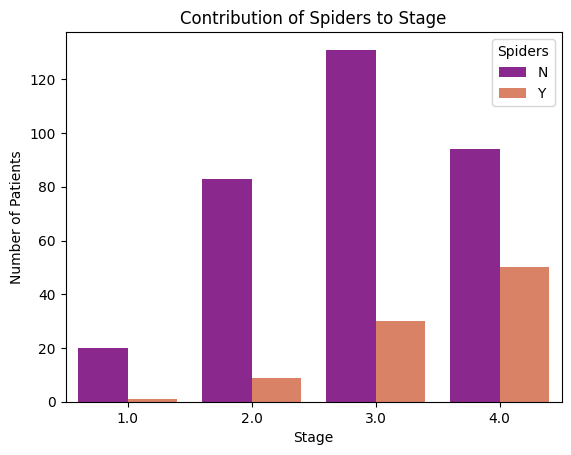

In [ ]:
sns.countplot(x='Stage',hue='Spiders',data=df,palette="plasma")
plt.title("Contribution of Spiders to Stage")
plt.xlabel('Stage')
plt.ylabel('Number of Patients')
plt.show()

* From this plot we can observe that Spiders is more commonly observed in advanced stages(Stage 4) and Spiders is less likely to be associated with the earlier stages

* Presence of Spiders alone is not enough to predict the stage

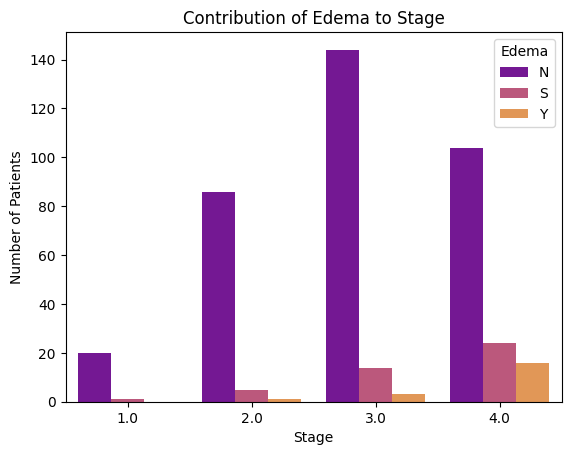

In [ ]:
sns.countplot(x='Stage',hue='Edema',data=df,palette="plasma")
plt.title("Contribution of Edema to Stage")
plt.xlabel('Stage')
plt.ylabel('Number of Patients')
plt.show()

The presence of edema might indicate a more advanced stage of the disease. Patients with swelling are generally in Stage 4, whereas those without edema are spread across multiple stages, including the earlier stages of the disease.

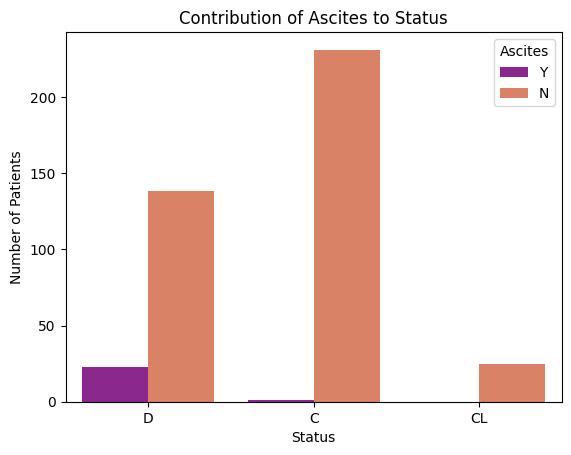

In [ ]:
sns.countplot(x='Status',hue='Ascites',data=df,palette="plasma")
plt.title("Contribution of Ascites to Status")
plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.show()

Patients without ascites are the only once recovering from cirrhosis(by Liver Transplantation)

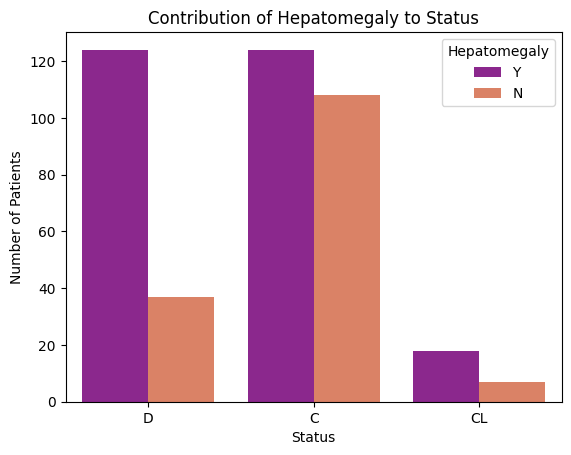

In [ ]:
sns.countplot(x='Status',hue='Hepatomegaly',data=df,palette="plasma")
plt.title("Contribution of Hepatomegaly to Status")
plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.show()

*  Hepatomegaly appears to be more common in deceased patients, indicating it might be a marker of more advanced or severe disease.
* There is no clear indication that hepatomegaly prevents recovery, as patients with hepatomegaly appear in both the C (alive at last follow-up) and CL (censored due to liver transplant) groups. However, it seems that recovery rates are lower compared to the number of patients who die (D) with hepatomegaly

This analysis suggests hepatomegaly could be associated with a higher risk of severe outcomes, but recovery is still possible with proper treatment.

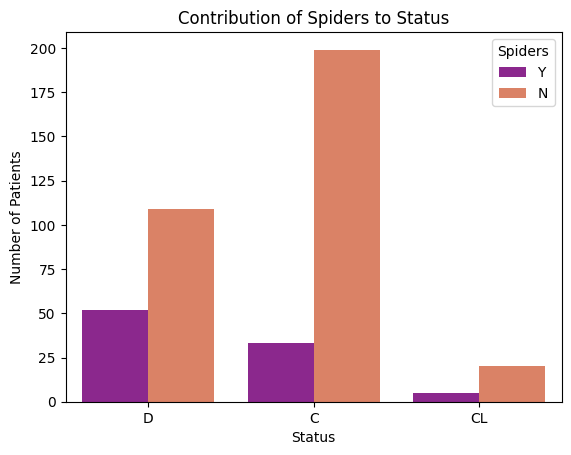

In [ ]:
sns.countplot(x='Status',hue='Spiders',data=df,palette="plasma")
plt.title("Contribution of Spiders to Status")
plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.show()

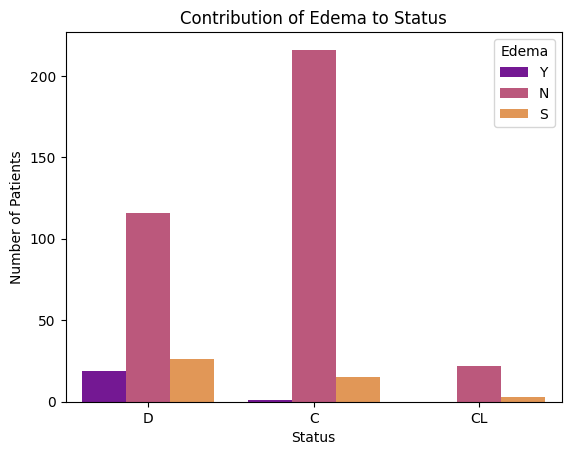

In [ ]:
sns.countplot(x='Status',hue='Edema',data=df,palette="plasma")
plt.title("Contribution of Edema to Status")
plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.show()

Edema's Impact: The presence of edema seems to be associated with poorer outcomes, as patients with edema have fewer instances of complete recovery and are less common among those receiving treatment. Conversely, patients without edema are more frequently seen among those receiving treatment and those who recover completely.
Predictive Value: While the presence of edema might indicate a more severe condition and poorer prognosis, it should be used in conjunction with other clinical factors to assess patient outcomes more accurately.

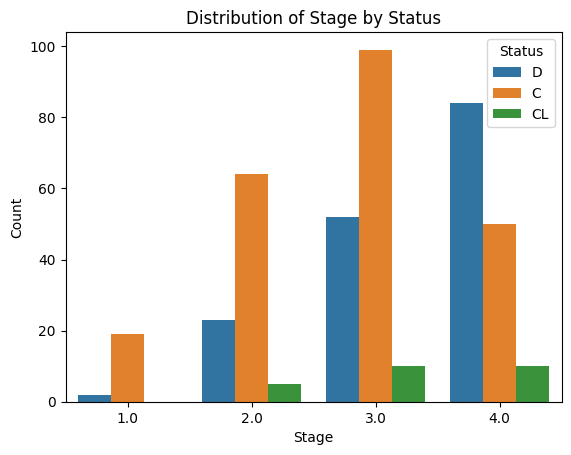

In [ ]:
sns.countplot(x="Stage", hue="Status", data=df)
plt.title('Distribution of Stage by Status')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

* Advanced Stages (3 and 4): These stages have the highest numbers of deceased patients, with Stage 4 showing the highest mortality. However, a significant number of patients in Stage 3 are still undergoing treatment, and a few have fully recovered in both stages.
* Early Stages (1 and 2): These stages have fewer deceased patients and more patients still receiving treatment, with some recoveries seen in Stage 2.

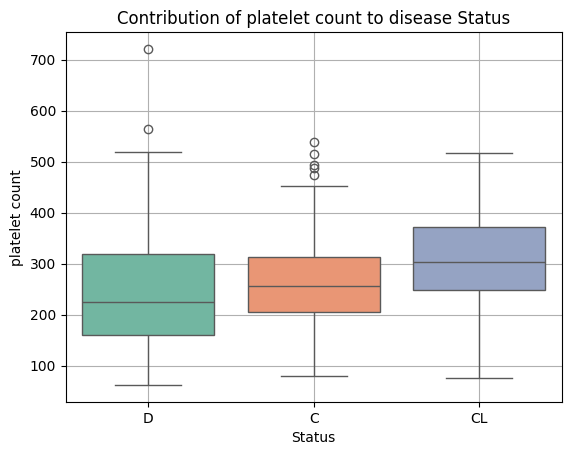

In [ ]:
sns.boxplot(x="Status",y="Platelets",data=df,palette="Set2")
plt.title("Contribution of platelet count to disease Status")
plt.xlabel("Status")
plt.ylabel("platelet count")
plt.grid(True)
plt.show()

On average, patients with good platelet counts are more likely to recover from the disease; however, platelet count alone is not sufficient to predict disease status

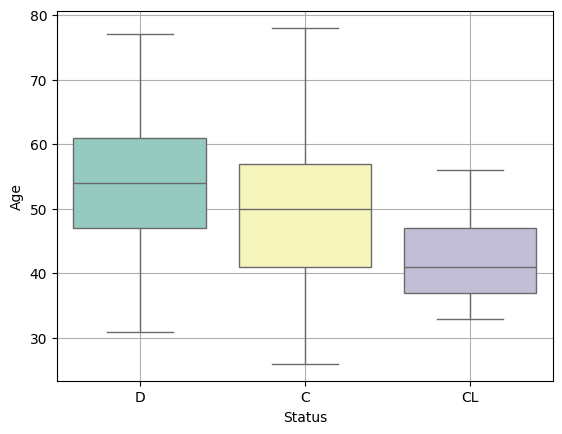

In [ ]:
sns.boxplot(x="Status",y="Age",data=df,palette="Set3")
plt.grid(True)
plt.show()

Age appears to influence recovery and mortality. Deceased patients tend to be older, while those fully cured include a significant number of younger individuals, suggesting that younger patients may have a better prognosis in fighting the disease. However, age alone isn't the only determining factor, as some older patients are also completely cured

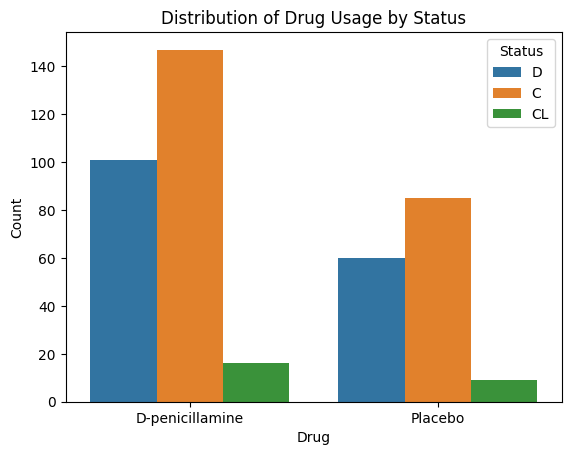

In [ ]:
sns.countplot(x="Drug", hue="Status", data=df)
plt.title('Distribution of Drug Usage by Status')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

D-penicillamine and Placebo have similar death rates and cure rates, with the Placebo group having a slightly higher percentage of deceased patients and a slightly lower percentage of completely cured patients. Based on these percentages, neither treatment is significantly better in terms of achieving a complete cure, but the death rates are almost comparable

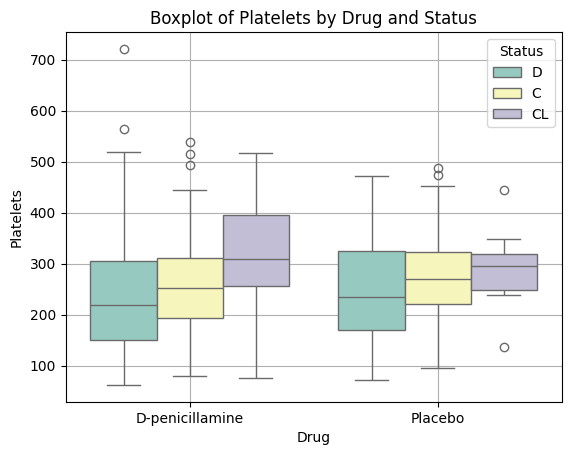

In [ ]:
sns.boxplot(x="Drug", y="Platelets", hue="Status", data=df, palette="Set3")
plt.title('Boxplot of Platelets by Drug and Status')
plt.xlabel('Drug')
plt.ylabel('Platelets')
plt.grid(True)
plt.show()

* Higher platelet counts appear to be associated with better recovery outcomes for both treatment groups.
* There is a wider variation in platelet counts among patients who did not survive, suggesting that low platelet counts might be a risk factor for worse outcomes.
* D-penicillamine seems to offer slightly better outcomes in terms of platelet count for completely cured patients, as their average count is marginally higher compared to placebo users.

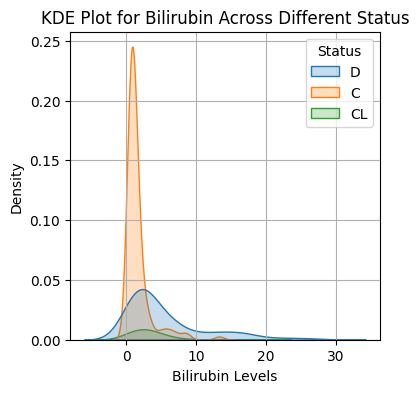

In [ ]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='Bilirubin', hue='Status', shade=True)
plt.title('KDE Plot for Bilirubin Across Different Status')
plt.xlabel('Bilirubin Levels')
plt.ylabel('Density')
plt.grid()
plt.show()

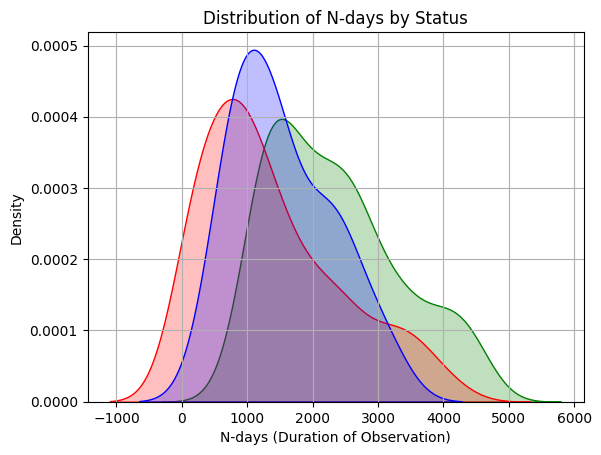

In [ ]:
sns.kdeplot(data=df[df['Status'] == 'C']['N_Days'], label='C', shade=True, color='green')
sns.kdeplot(data=df[df['Status'] == 'D']['N_Days'], label='D', shade=True, color='red')
sns.kdeplot(data=df[df['Status'] == 'CL']['N_Days'], label='CL', shade=True, color='blue')

plt.title('Distribution of N-days by Status')
plt.xlabel('N-days (Duration of Observation)')
plt.ylabel('Density')

plt.grid(True)
plt.show()

* The peak for completely cured (CL) patients is closer to 0.0005. This indicates that a larger number of these patients shared a similar number of observation days, meaning their observation durations were more consistent
* The peak for deceased (D) patients is closer to 0.0004. This suggests that the number of observation days for deceased patients was more spread out. The peak is lower, meaning that the observation days varied more widely among patients who died. Their durations were less concentrated, leading to a broader, lower peak

**Columns Before Removing Outliers**

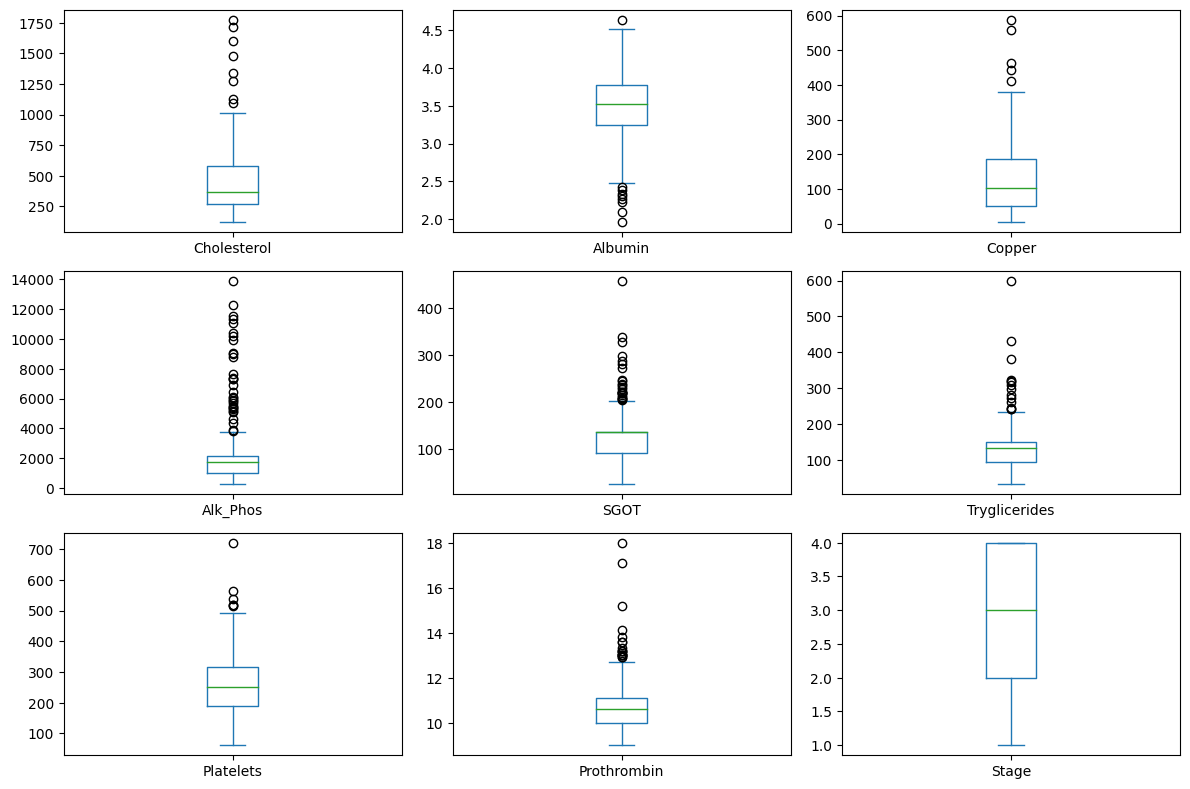

In [ ]:
numeric_columns = df.iloc[:, 10:19]
numeric_columns.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

**Columns After Removing Outliers**

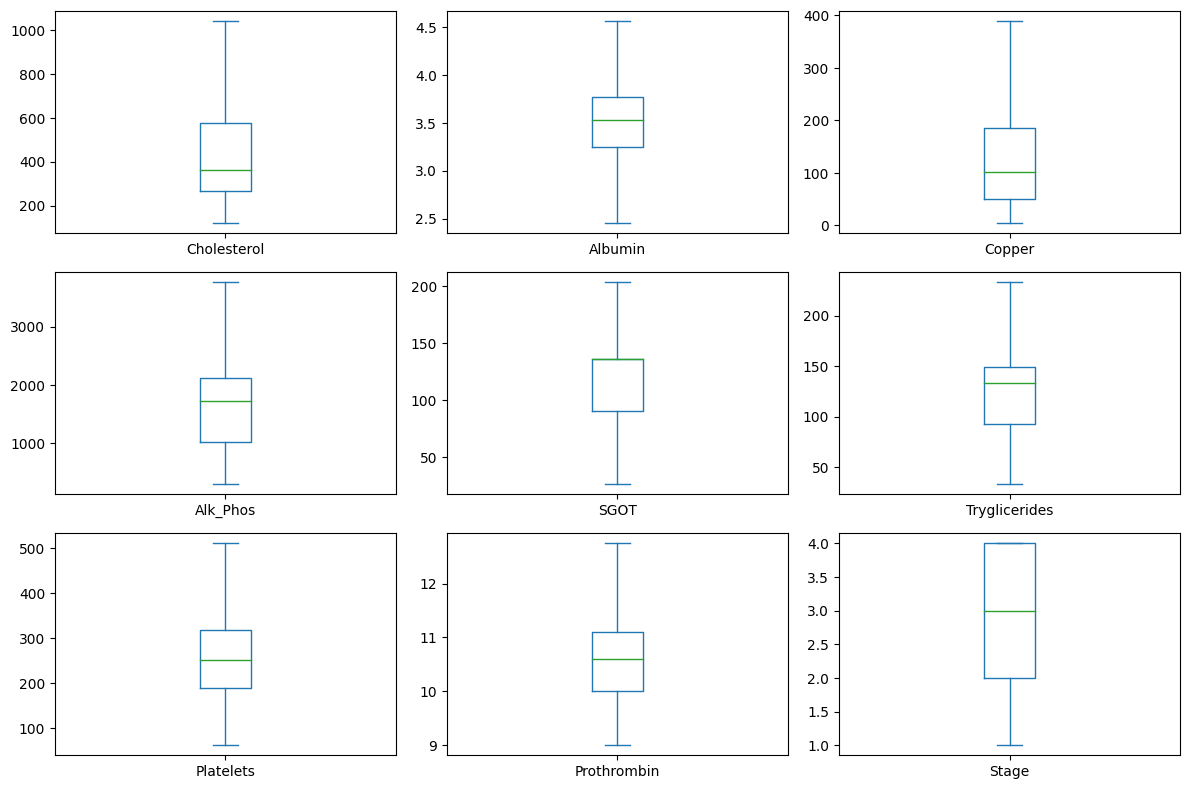

In [ ]:
import numpy as np
numeric_columns = df.iloc[:, 10:19]
df_no_outliers = numeric_columns.copy()
for col in df_no_outliers.columns:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    ll = Q1 - 1.5 * IQR
    ul = Q3 + 1.5 * IQR

    df_no_outliers[col] = np.where(df_no_outliers[col] > ul, ul, df_no_outliers[col])
    df_no_outliers[col] = np.where(df_no_outliers[col] < ll, ll, df_no_outliers[col])

df_no_outliers.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8))
plt.tight_layout()
plt.show()


# **Encoding**
Converting Categorical data into Numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])
df['Drug'] = le.fit_transform(df['Drug'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Ascites'] = le.fit_transform(df['Ascites'])
df['Hepatomegaly'] = le.fit_transform(df['Hepatomegaly'])
df['Spiders'] = le.fit_transform(df['Spiders'])
df['Edema'] = le.fit_transform(df['Edema'])
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


**Correlation Map**

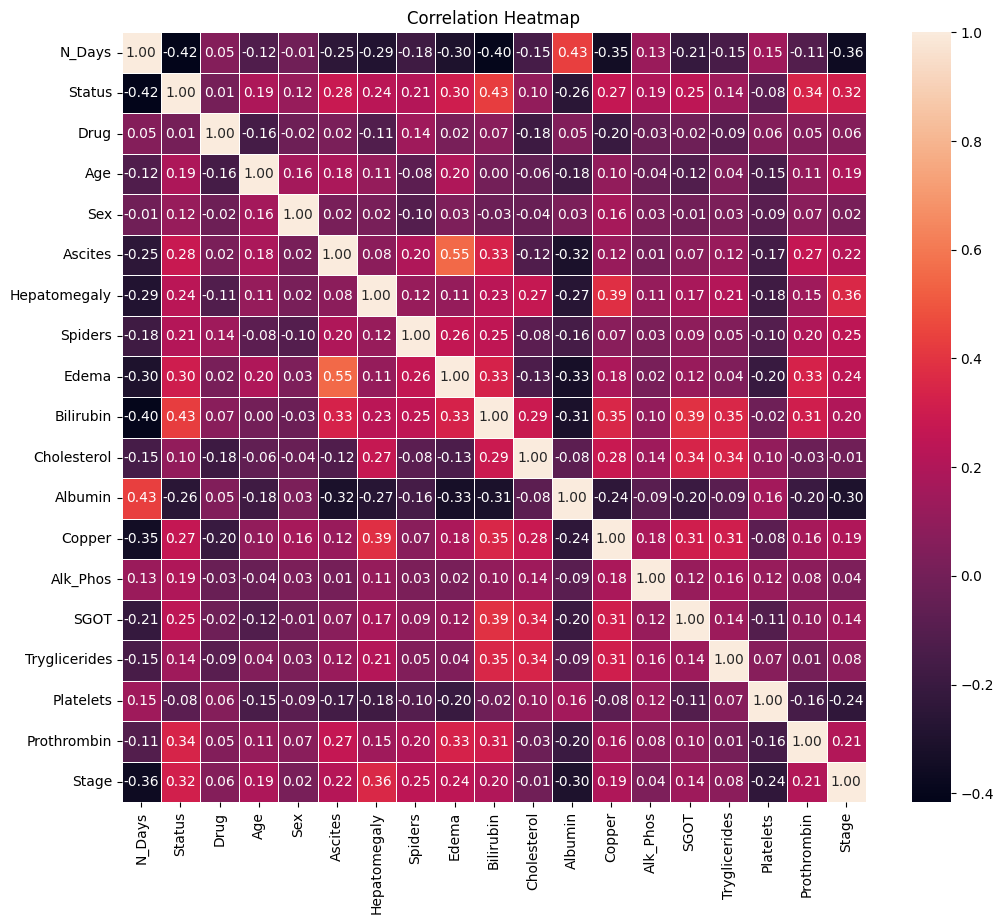

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap( df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Splliting Data**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Status')
y = df[['Status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (334, 18)
X_test shape: (84, 18)
y_train shape: (334, 1)
y_test shape: (84, 1)


**Feature Importance**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


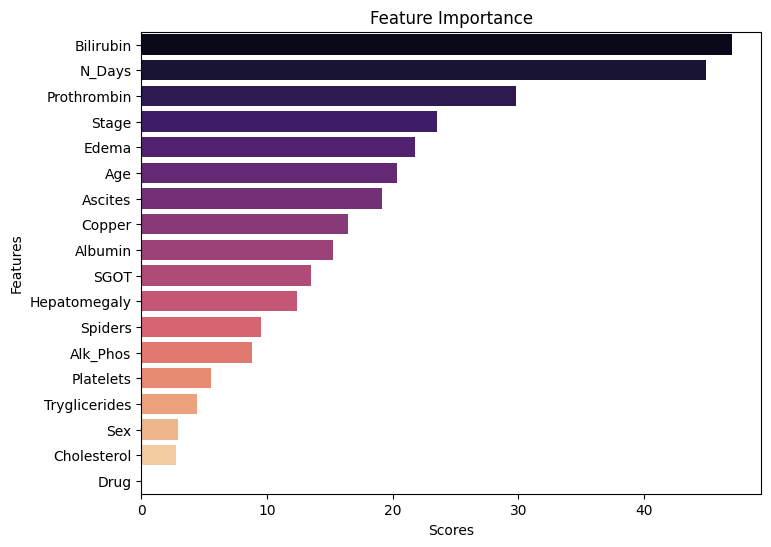

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)
feature_scores = selector.scores_
feature_names = X.columns
feature_score_df = pd.DataFrame({'Features': feature_names, 'Scores': feature_scores})

feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Scores', y='Features', data=feature_score_df, palette='magma')
plt.title('Feature Importance')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=8)
log_reg.fit(X_train_scaled, y_train)

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_scaled))
train_accuracy_log_reg = accuracy_score(y_train, log_reg.predict(X_train_scaled))

print(f"Training Accuracy of Logistic Regression is {train_accuracy_log_reg}")
print(f"Test Accuracy of Logistic Regression is {log_reg_acc} \n")


Training Accuracy of Logistic Regression is 0.7784431137724551
Test Accuracy of Logistic Regression is 0.75 



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(C=1.0, n_jobs=-1,random_state=7)

log_reg.fit(X_train_scaled, y_train)

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_scaled))
train_accuracy_log_reg = accuracy_score(y_train, log_reg.predict(X_train_scaled))

print(f"Training Accuracy of Logistic Regression: {train_accuracy_log_reg}")
print(f"Test Accuracy of Logistic Regression: {log_reg_acc}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy of Logistic Regression: 0.7784431137724551
Test Accuracy of Logistic Regression: 0.75



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


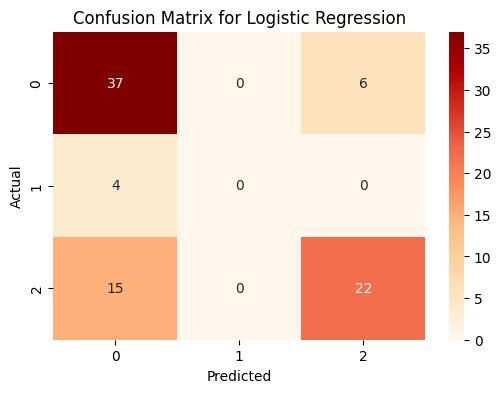

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75        43
           1       0.00      0.00      0.00         4
           2       0.79      0.59      0.68        37

    accuracy                           0.70        84
   macro avg       0.48      0.49      0.47        84
weighted avg       0.68      0.70      0.68        84



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from tabulate import tabulate
y_pred_log=log_reg.predict(X_test_scaled)
accuracy = round(accuracy_score(y_test, y_pred_log), 2)
f1 = f1_score(y_test, y_pred_log, average='micro')
precision = precision_score(y_test, y_pred_log, average='micro')
recall = recall_score(y_test, y_pred_log, average='micro')
jaccard = jaccard_score(y_test, y_pred_log, average='micro')
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score'],
        'Value': [accuracy, f1, precision, recall, jaccard]}
df_dtree = pd.DataFrame(data)
print(tabulate(df_dtree, headers='keys', tablefmt='grid'))


+----+---------------+---------+
|    | Metric        |   Value |
+====+===============+=========+
|  0 | Accuracy      |    0.75 |
+----+---------------+---------+
|  1 | F1 Score      |    0.75 |
+----+---------------+---------+
|  2 | Precision     |    0.75 |
+----+---------------+---------+
|  3 | Recall        |    0.75 |
+----+---------------+---------+
|  4 | Jaccard Score |    0.6  |
+----+---------------+---------+


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(y_resampled.value_counts())

Status
0         189
1         189
2         189
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=7)

log_reg.fit(X_train_scaled, y_train)

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_scaled))
train_accuracy_log_reg = accuracy_score(y_train, log_reg.predict(X_train_scaled))

print(f"Training Accuracy of Logistic Regression: {train_accuracy_log_reg}")
print(f"Test Accuracy of Logistic Regression: {log_reg_acc} \n")

Training Accuracy of Logistic Regression: 0.7784431137724551
Test Accuracy of Logistic Regression: 0.75 



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#**Decision Tree**




**Decision Tree with default parameters**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
dtc_acc=accuracy_score(y_test,dtc.predict(X_test))
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.7261904761904762 



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(y_resampled.value_counts())

Status
0         189
1         189
2         189
Name: count, dtype: int64


In [ ]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
dtc_acc=accuracy_score(y_test,dtc.predict(X_test))
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.7261904761904762 



*Confusion Matrix*

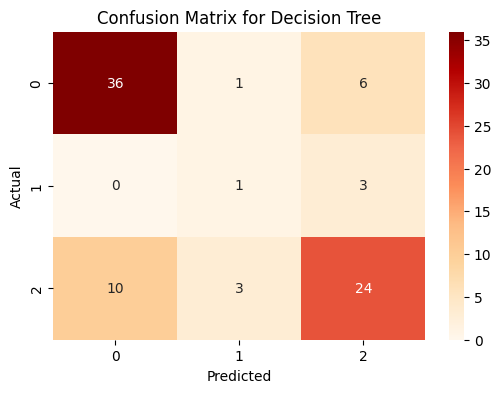

In [ ]:
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


*Classification Report*

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        43
           1       0.20      0.25      0.22         4
           2       0.73      0.65      0.69        37

    accuracy                           0.73        84
   macro avg       0.57      0.58      0.57        84
weighted avg       0.73      0.73      0.73        84



* Precision: The ratio of true positive predictions to the total positive predictions.
* Recall: The ratio of true positive predictions to the actual positive cases in the dataset.
* Jaccard Score: The size of the intersection divided by the size of the union of true and predicted labels (similar to the IoU).
* F1 Score: The harmonic mean of precision and recall, balancing both metrics.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from tabulate import tabulate
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
jaccard = jaccard_score(y_test, y_pred, average='micro')
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score'],
        'Value': [accuracy, f1, precision, recall, jaccard]}
df_dtree = pd.DataFrame(data)
print(tabulate(df_dtree, headers='keys', tablefmt='grid'))


+----+---------------+-----------+
|    | Metric        |     Value |
+====+===============+===========+
|  0 | Accuracy      | 72.62     |
+----+---------------+-----------+
|  1 | F1 Score      |  0.72619  |
+----+---------------+-----------+
|  2 | Precision     |  0.72619  |
+----+---------------+-----------+
|  3 | Recall        |  0.72619  |
+----+---------------+-----------+
|  4 | Jaccard Score |  0.570093 |
+----+---------------+-----------+


***Decision Tree Classifier with criterion gini index***


In [ ]:
dtc_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
dtc_gini.fit(X_train, y_train)
dtc_gini_acc=accuracy_score(y_test,dtc_gini.predict(X_test))
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc_gini.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_gini_acc} \n")

Training Accuracy of Decision Tree Classifier is 0.8473053892215568
Test Accuracy of Decision Tree Classifier is 0.75 



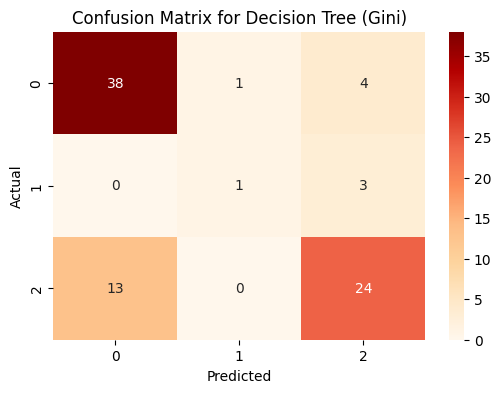

In [ ]:
y_pred_gini = dtc_gini.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for Decision Tree (Gini)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        43
           1       0.50      0.25      0.33         4
           2       0.77      0.65      0.71        37

    accuracy                           0.75        84
   macro avg       0.67      0.59      0.62        84
weighted avg       0.75      0.75      0.74        84



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from tabulate import tabulate
accuracy = round(accuracy_score(y_test, y_pred_gini ) * 100, 2)
f1 = f1_score(y_test,y_pred_gini , average='micro')
precision = precision_score(y_test, y_pred_gini , average='micro')
recall = recall_score(y_test,y_pred_gini , average='micro')
jaccard = jaccard_score(y_test,y_pred_gini , average='micro')
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score'],
        'Value': [accuracy, f1, precision, recall, jaccard]}
df_dtree = pd.DataFrame(data)
print(tabulate(df_dtree, headers='keys', tablefmt='grid'))


+----+---------------+---------+
|    | Metric        |   Value |
+====+===============+=========+
|  0 | Accuracy      |   75    |
+----+---------------+---------+
|  1 | F1 Score      |    0.75 |
+----+---------------+---------+
|  2 | Precision     |    0.75 |
+----+---------------+---------+
|  3 | Recall        |    0.75 |
+----+---------------+---------+
|  4 | Jaccard Score |    0.6  |
+----+---------------+---------+


***13. Decision Tree Classifier with criterion entropy***

In [ ]:
dtc_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtc_entropy.fit(X_train, y_train)
dtc_entropy_acc=accuracy_score(y_test,dtc_entropy.predict(X_test))
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc_entropy.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_entropy_acc} \n")

Training Accuracy of Decision Tree Classifier is 0.8353293413173652
Test Accuracy of Decision Tree Classifier is 0.6071428571428571 



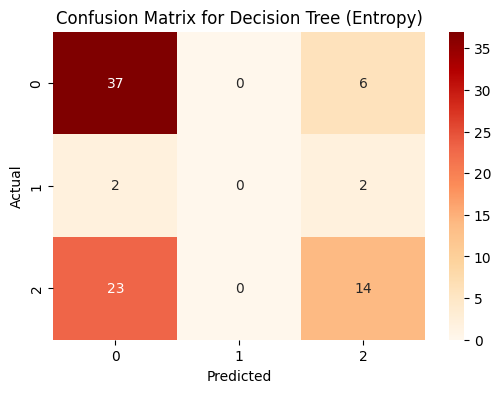

In [ ]:
y_pred_entropy = dtc_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,cmap='OrRd')
plt.title('Confusion Matrix for Decision Tree (Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.60      0.86      0.70        43
           1       0.00      0.00      0.00         4
           2       0.64      0.38      0.47        37

    accuracy                           0.61        84
   macro avg       0.41      0.41      0.39        84
weighted avg       0.59      0.61      0.57        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


*Roc Curve*

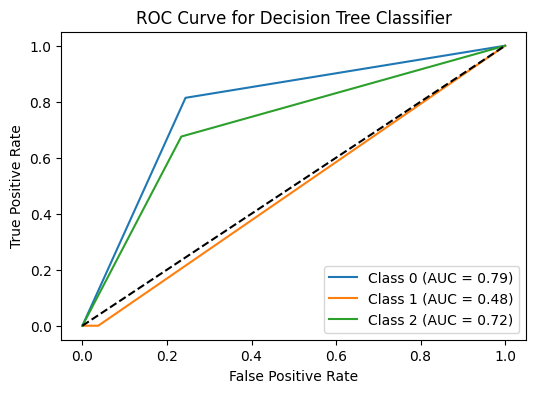

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_proba = dtc.predict_proba(X_test)
plt.figure(figsize=(6,4))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# **Random Forest**

Random Forest with default paramters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier(random_state=0)
rdf.fit(X_train,y_train)
rdf_acc=accuracy_score(y_test,rdf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rdf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rdf_acc} \n")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.7380952380952381 



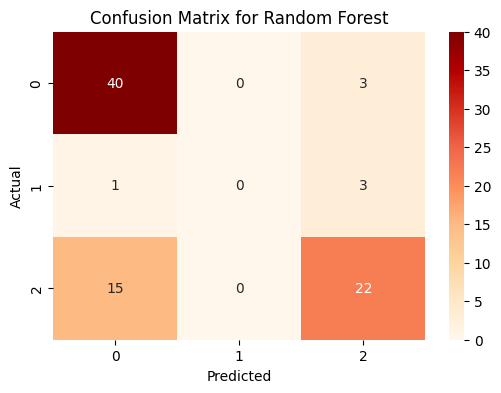

In [ ]:
y_pred_rdf = rdf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rdf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rdf,zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        43
           1       0.00      0.00      0.00         4
           2       0.79      0.59      0.68        37

    accuracy                           0.74        84
   macro avg       0.50      0.51      0.50        84
weighted avg       0.71      0.74      0.71        84



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
from tabulate import tabulate
accuracy = round(accuracy_score(y_test, y_pred_rdf) * 100, 2)
f1 = f1_score(y_test, y_pred_rdf, average='micro')
precision = precision_score(y_test, y_pred_rdf, average='micro')
recall = recall_score(y_test, y_pred_rdf, average='micro')
jaccard = jaccard_score(y_test, y_pred_rdf, average='micro')
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score'],
        'Value': [accuracy, f1, precision, recall, jaccard]}
df_rdf= pd.DataFrame(data)
print(tabulate(df_rdf, headers='keys', tablefmt='grid'))

+----+---------------+-----------+
|    | Metric        |     Value |
+====+===============+===========+
|  0 | Accuracy      | 73.81     |
+----+---------------+-----------+
|  1 | F1 Score      |  0.738095 |
+----+---------------+-----------+
|  2 | Precision     |  0.738095 |
+----+---------------+-----------+
|  3 | Recall        |  0.738095 |
+----+---------------+-----------+
|  4 | Jaccard Score |  0.584906 |
+----+---------------+-----------+


In [ ]:
rdf_1= RandomForestClassifier(n_estimators=100, random_state=0)
rdf_1.fit(X_train, y_train)
rdf_1_acc=accuracy_score(y_test,rdf_1.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rdf_1.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rdf_1_acc} \n")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.7380952380952381 



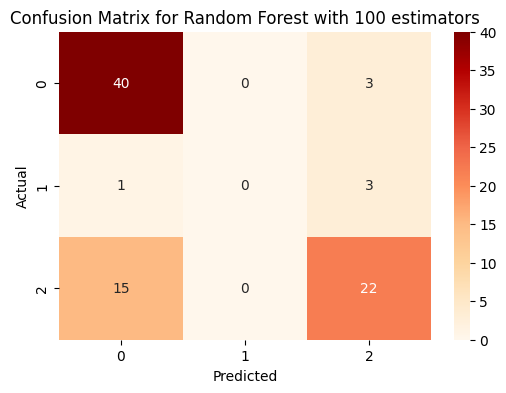

In [ ]:
y_pred_rdf_1 = rdf_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rdf_1)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.title('Confusion Matrix for Random Forest with 100 estimators')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rdf_1,zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        43
           1       0.00      0.00      0.00         4
           2       0.79      0.59      0.68        37

    accuracy                           0.74        84
   macro avg       0.50      0.51      0.50        84
weighted avg       0.71      0.74      0.71        84



In [ ]:
rdf_2= RandomForestClassifier(n_estimators=1000, random_state=0)
rdf_2.fit(X_train, y_train)
rdf_2_acc=accuracy_score(y_test,rdf_2.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rdf_2.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rdf_2_acc} \n")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.7023809523809523 



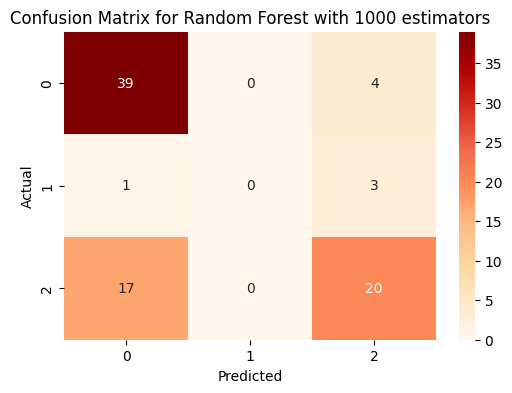

In [ ]:
y_pred_rdf_2= rdf_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rdf_2)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for Random Forest with 1000 estimators')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rdf_2,zero_division=0))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78        43
           1       0.00      0.00      0.00         4
           2       0.74      0.54      0.62        37

    accuracy                           0.70        84
   macro avg       0.47      0.48      0.47        84
weighted avg       0.68      0.70      0.67        84



In [ ]:
feature_scores = pd.Series(rdf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
N_Days,0.192171
Bilirubin,0.134728
Prothrombin,0.101873
Age,0.079419
Platelets,0.073124
Albumin,0.071143
Copper,0.063763
Alk_Phos,0.052972
Tryglicerides,0.047011
Cholesterol,0.043844


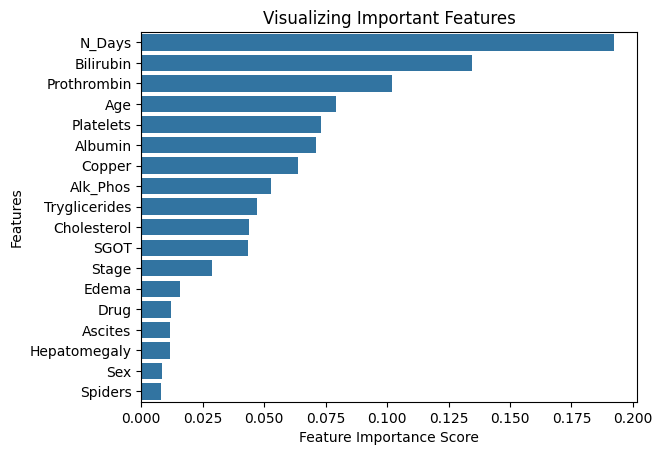

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

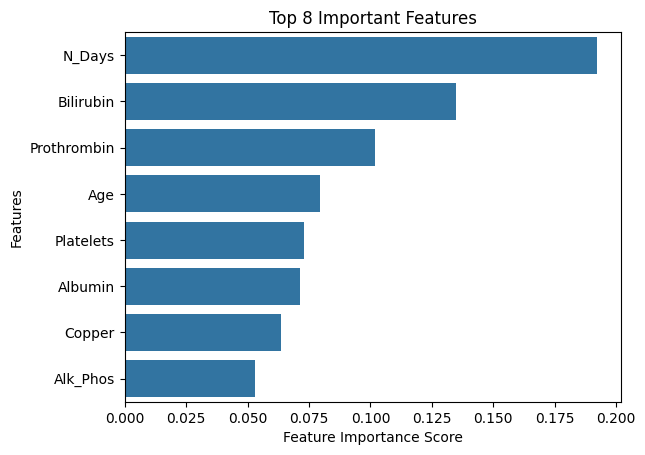

In [ ]:
top_8_features = feature_scores.sort_values(ascending=False).head(8)
sns.barplot(x=top_8_features, y=top_8_features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top 8 Important Features")
plt.show()

# **Support_Vector_Machine**

SVM with default parameters

In [ ]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
svm_acc=accuracy_score(y_test,svm.predict(X_test))
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


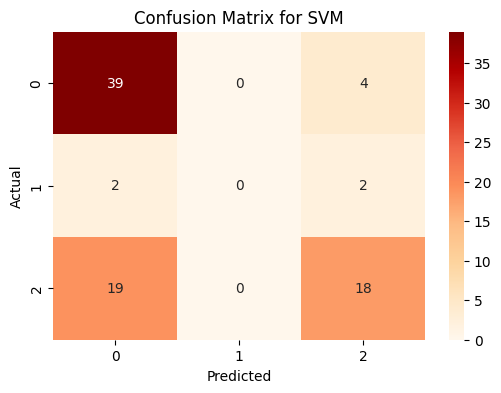

In [ ]:
y_pred_svm= svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm,zero_division=0))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        43
           1       0.00      0.00      0.00         4
           2       0.75      0.49      0.59        37

    accuracy                           0.68        84
   macro avg       0.47      0.46      0.45        84
weighted avg       0.66      0.68      0.65        84



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from tabulate import tabulate
accuracy = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
f1 = f1_score(y_test, y_pred_svm, average='micro')
precision = precision_score(y_test, y_pred_svm, average='micro')
recall = recall_score(y_test, y_pred_svm, average='micro')
jaccard = jaccard_score(y_test, y_pred_svm, average='micro')
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score'],
        'Value': [accuracy, f1, precision, recall, jaccard]}
df_svm = pd.DataFrame(data)
print(tabulate(df_svm, headers='keys', tablefmt='grid'))

+----+---------------+-----------+
|    | Metric        |     Value |
+====+===============+===========+
|  0 | Accuracy      | 67.86     |
+----+---------------+-----------+
|  1 | F1 Score      |  0.678571 |
+----+---------------+-----------+
|  2 | Precision     |  0.678571 |
+----+---------------+-----------+
|  3 | Recall        |  0.678571 |
+----+---------------+-----------+
|  4 | Jaccard Score |  0.513514 |
+----+---------------+-----------+


*SVM with rbf kernel and C=100*

In [ ]:
svc=SVC(kernel='rbf',C=100.0)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*SVM with rbf kernel and C=1000*

In [ ]:
svc=SVC(kernel='rbf',C=1000)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*SVM with linear kernel and C=10*

In [ ]:
svc=SVC(kernel='linear',C=10)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


*SVM with linear kernel and C=100*

In [ ]:
svc=SVC(kernel='linear',C=100)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


*SVM with linear kernel and C=1000*

In [ ]:
svc=SVC(kernel='linear',C=1000)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


*SVM with poly kernel and C=10*

In [ ]:
svc=SVC(kernel='poly',C=10)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*SVM with poly kernel and C=100*

In [ ]:
svc=SVC(kernel='poly',C=100.0)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*SVM with linear poly and C=1000*

In [ ]:
svc=SVC(kernel='poly',C=1000)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


*SVM with sigmoid kernel and C=10*

In [ ]:
svc=SVC(kernel='sigmoid',C=10)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*SVM with sigmoid kernel and C=100*

In [ ]:
svc=SVC(kernel='sigmoid',C=100)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*SVM with sigmoid kernel and C=1000*

In [ ]:
svc=SVC(kernel='sigmoid',C=1000)
svc.fit(X_train,y_train)
print(f"Training Accuracy of SVM: {accuracy_score(y_train,svm.predict(X_train))}")
print(f"Test Accuracy of SVM: {svm_acc}")

Training Accuracy of SVM: 0.7425149700598802
Test Accuracy of SVM: 0.6785714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
gnb_acc=accuracy_score(y_test,gnb.predict(X_test))
print(f"Training Accuracy of Gaussian Naive Bayes: {accuracy_score(y_train,gnb.predict(X_train))}")
print(f"Test Accuracy of Gaussian Naive Bayes: {gnb_acc}")

Training Accuracy of Gaussian Naive Bayes: 0.6946107784431138
Test Accuracy of Gaussian Naive Bayes: 0.6428571428571429


# **Boosting Algorithms**

##**AdaBoost classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=20)
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=20)

In [ ]:
ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

Training Accuracy of Ada Boost Classifier is 0.7934131736526946
Test Accuracy of Ada Boost Classifier is 0.7261904761904762 



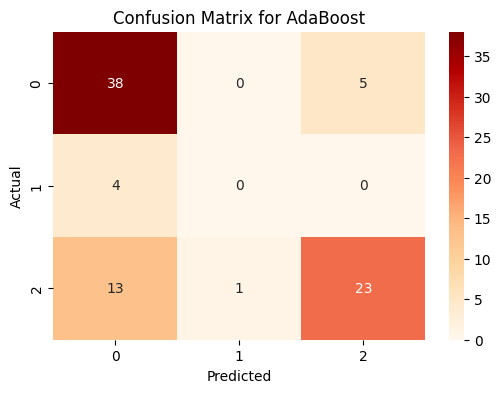

In [ ]:
y_pred_ada= ada.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_ada,zero_division=0))

              precision    recall  f1-score   support

           0       0.69      0.88      0.78        43
           1       0.00      0.00      0.00         4
           2       0.82      0.62      0.71        37

    accuracy                           0.73        84
   macro avg       0.50      0.50      0.49        84
weighted avg       0.72      0.73      0.71        84



In [ ]:
accuracy = round(accuracy_score(y_test, y_pred_ada) * 100, 2)
f1 = f1_score(y_test, y_pred_ada, average='micro')
precision = precision_score(y_test, y_pred_ada, average='micro')
recall = recall_score(y_test, y_pred_ada, average='micro')
jaccard = jaccard_score(y_test, y_pred_ada, average='micro')
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score'],
        'Value': [accuracy, f1, precision, recall, jaccard]}
df_ada= pd.DataFrame(data)
print(tabulate(df_ada, headers='keys', tablefmt='grid'))

+----+---------------+-----------+
|    | Metric        |     Value |
+====+===============+===========+
|  0 | Accuracy      | 72.62     |
+----+---------------+-----------+
|  1 | F1 Score      |  0.72619  |
+----+---------------+-----------+
|  2 | Precision     |  0.72619  |
+----+---------------+-----------+
|  3 | Recall        |  0.72619  |
+----+---------------+-----------+
|  4 | Jaccard Score |  0.570093 |
+----+---------------+-----------+


In [ ]:
ada = AdaBoostClassifier(random_state=20,n_estimators=400,learning_rate=0.2)
ada.fit(X_train, y_train)
ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy of Ada Boost Classifier is 0.8173652694610778
Test Accuracy of Ada Boost Classifier is 0.6190476190476191 



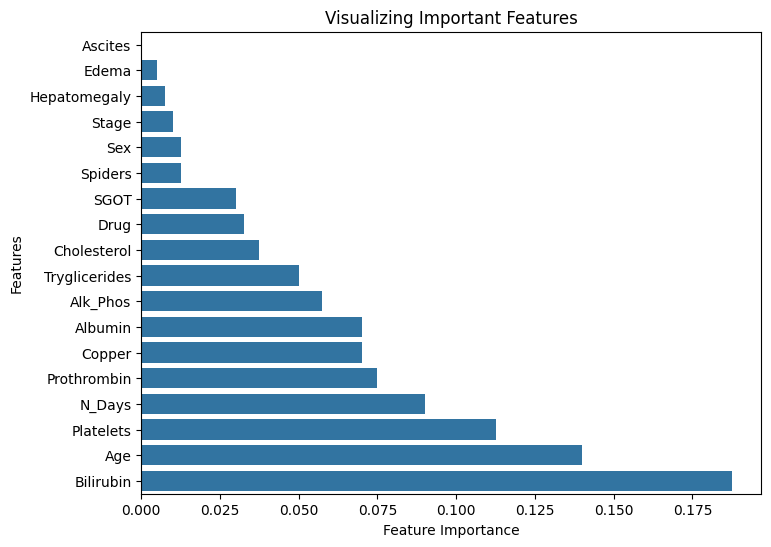

In [ ]:
ada_in = ada.feature_importances_.argsort()[:]

plt.figure(figsize=(8,6))
sns.barplot(x=ada.feature_importances_[ada_in], y=X_train.columns[ada_in])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()


##**GradientBoost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21)
gbc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=21)

In [ ]:
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {gbc_acc} \n")

Training Accuracy of XgBoost is 0.9970059880239521
Test Accuracy of XgBoost is 0.7380952380952381 



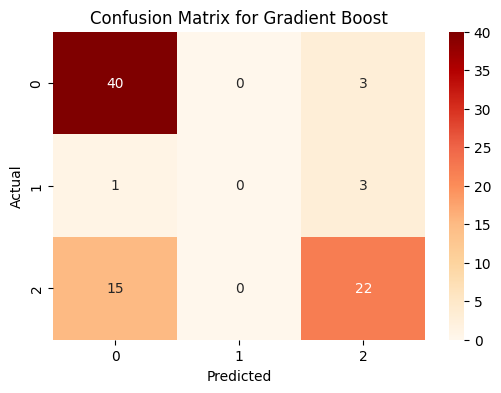

In [ ]:
y_pred_gbc= gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for Gradient Boost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_gbc,zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        43
           1       0.00      0.00      0.00         4
           2       0.79      0.59      0.68        37

    accuracy                           0.74        84
   macro avg       0.50      0.51      0.50        84
weighted avg       0.71      0.74      0.71        84



In [ ]:
accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100, 2)
f1 = f1_score(y_test, y_pred_gbc, average='micro')
precision = precision_score(y_test, y_pred_gbc, average='micro')
recall = recall_score(y_test, y_pred_gbc, average='micro')
jaccard = jaccard_score(y_test, y_pred_gbc, average='micro')
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score'],
        'Value': [accuracy, f1, precision, recall, jaccard]}
df_gbc= pd.DataFrame(data)
print(tabulate(df_gbc, headers='keys', tablefmt='grid'))

+----+---------------+-----------+
|    | Metric        |     Value |
+====+===============+===========+
|  0 | Accuracy      | 73.81     |
+----+---------------+-----------+
|  1 | F1 Score      |  0.738095 |
+----+---------------+-----------+
|  2 | Precision     |  0.738095 |
+----+---------------+-----------+
|  3 | Recall        |  0.738095 |
+----+---------------+-----------+
|  4 | Jaccard Score |  0.584906 |
+----+---------------+-----------+


In [ ]:
gbc = GradientBoostingClassifier(random_state=21,learning_rate= 0.2,max_depth=3,max_features='log2',n_estimators=50)
gbc.fit(X_train, y_train)
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {gbc_acc} \n")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy of XgBoost is 0.9880239520958084
Test Accuracy of XgBoost is 0.7023809523809523 



Text(0.5, 1.0, 'Visualizing Important Features')

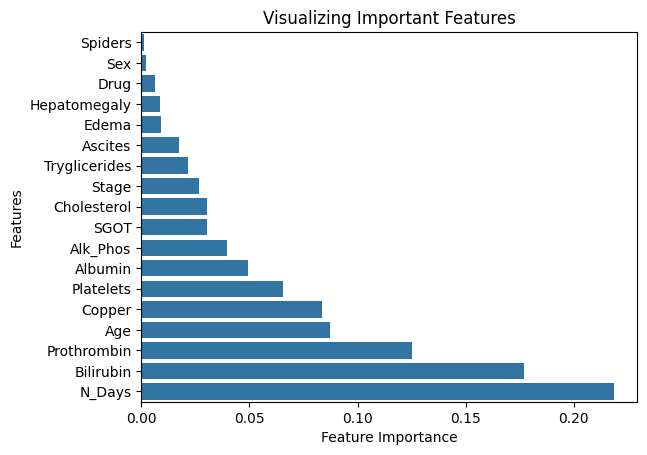

In [ ]:
gbc_in = gbc.feature_importances_.argsort()
sns.barplot(x=gbc.feature_importances_[gbc_in], y=X_train.columns[gbc_in])
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.title('Visualizing Important Features')

##**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.7023809523809523 



In [ ]:
xgb = XGBClassifier(random_state=12,n_estimators=50,learning_rate=0.2,gamma=0.25,max_depth=3)
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

Training Accuracy of XgBoost is 0.9580838323353293
Test Accuracy of XgBoost is 0.7142857142857143 



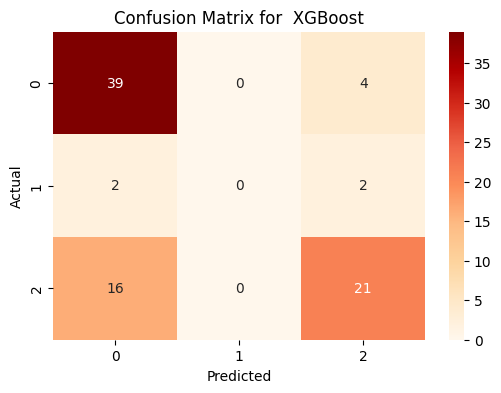

In [ ]:
y_pred_xgb= xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='OrRd')
plt.title('Confusion Matrix for  XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_xgb,zero_division=0))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78        43
           1       0.00      0.00      0.00         4
           2       0.78      0.57      0.66        37

    accuracy                           0.71        84
   macro avg       0.49      0.49      0.48        84
weighted avg       0.69      0.71      0.69        84



In [ ]:
accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100, 2)
f1 = f1_score(y_test, y_pred_xgb, average='micro')
precision = precision_score(y_test, y_pred_xgb, average='micro')
recall = recall_score(y_test, y_pred_xgb, average='micro')
jaccard = jaccard_score(y_test, y_pred_xgb, average='micro')
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score'],
        'Value': [accuracy, f1, precision, recall, jaccard]}
df_xgb= pd.DataFrame(data)
print(tabulate(df_xgb, headers='keys', tablefmt='grid'))

+----+---------------+-----------+
|    | Metric        |     Value |
+====+===============+===========+
|  0 | Accuracy      | 73.81     |
+----+---------------+-----------+
|  1 | F1 Score      |  0.714286 |
+----+---------------+-----------+
|  2 | Precision     |  0.714286 |
+----+---------------+-----------+
|  3 | Recall        |  0.714286 |
+----+---------------+-----------+
|  4 | Jaccard Score |  0.555556 |
+----+---------------+-----------+


Text(0.5, 1.0, 'Visualizing Important Features')

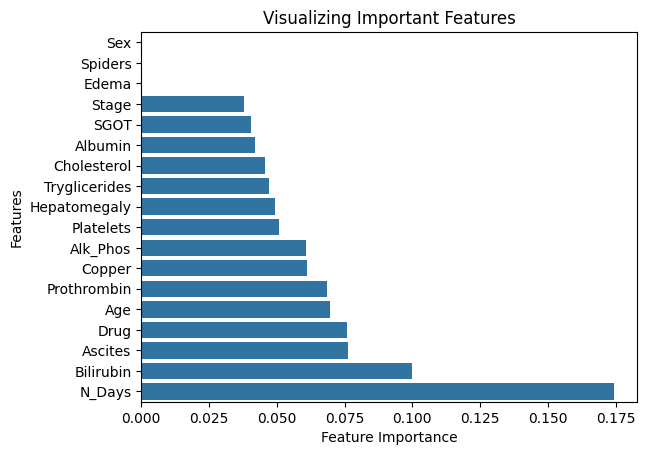

In [ ]:
xgb_in = xgb.feature_importances_.argsort()
sns.barplot(x=xgb.feature_importances_[xgb_in], y=X_train.columns[xgb_in])
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.title('Visualizing Important Features')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")


Training Accuracy of KNN is 0.7634730538922155
Test Accuracy of KNN is 0.7023809523809523 



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##**Accuracy Table**

In [ ]:
from tabulate import tabulate
data = [
    ['Logistic Regression',log_reg_acc],
    ["Decision Tree", dtc_gini_acc],
    ["Random Forest", rdf_acc],
    ["SVM",svm_acc],
    ["AdaBoost", ada_acc],
    ['Gaussian Navie Bayes',gnb_acc],
    ['Gradient Boost',gbc_acc],
    ['Xg Boost',xgb_acc],
    ['KNN',knn_acc]
]

headers = ["Model", "Accuracy"]
data_sorted = sorted(data, key=lambda x: x[1])
print(tabulate(data_sorted, headers, tablefmt="pretty"))


+----------------------+--------------------+
|        Model         |      Accuracy      |
+----------------------+--------------------+
|       AdaBoost       | 0.6190476190476191 |
| Gaussian Navie Bayes | 0.6428571428571429 |
|         SVM          | 0.6785714285714286 |
|    Gradient Boost    | 0.7023809523809523 |
|         KNN          | 0.7023809523809523 |
|       Xg Boost       | 0.7142857142857143 |
|    Random Forest     | 0.7380952380952381 |
| Logistic Regression  |        0.75        |
|    Decision Tree     |        0.75        |
+----------------------+--------------------+


# **Conclusion and Result:**
* The objective of this analysis is to develop a classification model to predict patient outcomes based on the cirrhosis dataset.
* The model highlighted important variables, such as bilirubin and hepatomegaly, that may play critical roles in patient outcomes.
* In terms of overall performance, Logistic Regression and Decision Tree are the most effective classifier for liver disease prediction, followed by Random Forest, while Naïve Bayes and AdaBoost performed the worst across most metrics.